# Web Scraping: List of My Future Co-Workers - AJAX version

Scrape the employee list on the website of my employer, store all content in a DataFrame, make a Wordcloud. This time I scraped all 825 employes from the (AJAX) homepage. This request returns the data in JSON format. (A good tutorial on scraping AJAX pages can be found [here](http://toddhayton.com/2015/03/11/scraping-ajax-pages-with-python/).

Little bonus: In the end I made a Wordcloud from the Given Names using Andreas Müllers [WordCloud](http://amueller.github.io/word_cloud/index.html) package.


### Data Sources

- `https://implementconsultinggroup.com/who-we-are/people/`: List of all employees at Implement Consulting Group

### Changes

- 2019-02-25: Start & terminate project


---

### Import libraries, load data

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import json

# My functions
import EDA_functions as EDA
import cleaning_functions as cleaning

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns #, sns.set_style('whitegrid')
color = 'rebeccapurple'
%matplotlib inline

# Display settings
from IPython.display import display
pd.options.display.max_columns = 100

## 1) Scrape Employee-Data, Create Adressbook

In [2]:
# Fetch web page content
url = "https://implementconsultinggroup.com/who-we-are/people/?altTemplate=GridJSON&id=0&sort=date&amount=1000&from=0"
response = requests.get(url)

In [3]:
# Response is in JSON-Format, save to dict
employees = json.loads(response.text)

In [54]:
# Parse dict - get relevant data for first employee 
print(employees['modules'][0]['data']['headline'])
print(employees['modules'][0]['data']['text'])

Aage Lemche-Romvig
<a href='tel:+45 3085 8012'>+45 3085 8012</a><br/><a href='mailto:alr@implement.dk'>alr@implement.dk</a><br/><a href='https://dk.linkedin.com/in/romvig'>LinkedIn</a>


In [34]:
# Save all employee data to DataFrame

employees_list = []

for n, employee in enumerate(employees['modules']):
    name = employees['modules'][n]['data']['headline']
    given, last = name.split(' ', 1)
    try:
        soup = BeautifulSoup(employees['modules'][n]['data']['text'], "lxml")
        links = soup.find_all('a')
        for e, link in enumerate(links):
            if e == 0:
                phone = link.get_text().strip()
            if e == 1:
                mail = link.get_text().strip()
            else:
                if len(links) == 2:
                    linkedIn = ''
                else:
                    linkedIn = link['href']
    except Exception as e:
        print(name)
                
    employees_list.append({'Given Name': given,
                           'Last Name': last,
                           'Phone': phone,
                           'E-Mail': mail,
                           'LinkedIn Profile': linkedIn
                          })        

adressbook = pd.DataFrame(employees_list, columns = employees_list[0].keys())

Adrian Sefai Antonsson
Jan-Olav Øderud


In [53]:
# Create a country column
adressbook['Country'] = adressbook['E-Mail'].str.split('.').str.get(1).str.upper()
adressbook['Country'].value_counts()

# Check results
print(len(adressbook))
display(adressbook.tail())

823


,Given Name,Last Name,Phone,E-Mail,LinkedIn Profile,Country
818,Viktor,Greir,+45 5221 6015,vigr@implement.dk,https://www.linkedin.com/in/viktorgreir/,DK
819,Viktor,Nilsson,+46 738 670 532,vini@implement.se,https://www.linkedin.com/in/viknil/,SE
820,Wenche,Andersson,+46 0 702 895 310,wman@implement.se,https://www.linkedin.com/in/wenche-andersson-2...,SE
821,Åsa,Rehn,+46 738 670 533,areh@implement.se,https://www.linkedin.com/in/%C3%A5sa-rehn-ba64...,SE
822,​Amelia,Holmegaard Nielsen,+45 2289 9250,ahon@implement.dk,https://www.linkedin.com/in/amelia-holmegaard-...,DK


---

## 2) Make Wordcloud from top 50 names

Wordcloud package from A. Müller, [API description](http://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html)

In [43]:
# Prepare clean string containing all given names
to_replace = ["[", "]", ",", "'"]
names_list = str(adressbook['Given Name'].values)
for symbol in to_replace:
    names_list = names_list.replace(symbol, '')

In [48]:
# Check results
print(names_list[:100])

Aage Abtin Adam Adam Adam Adrian Adrian Agnete Albert
 Aleksander Alexander Alexander Alfred Allan A


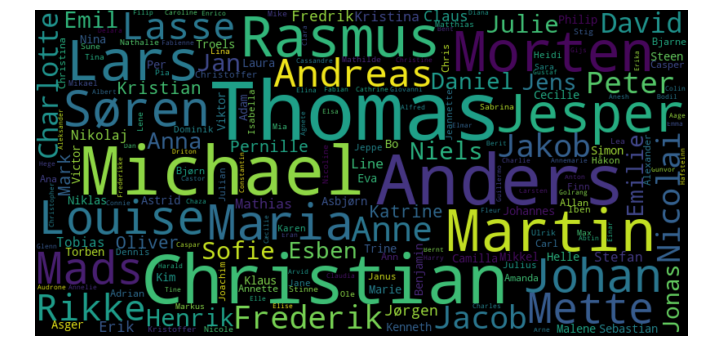

In [52]:
# Generate a word cloud image (see note below)
wordcloud = WordCloud(max_font_size=100, 
                      width=800, 
                      height=400,
                      collocations=False
                     ).generate(names_list)

# Display it matplotlib style
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

**Note**: The input “text” is expected to be a natural text. If you pass a sorted list of words, words will appear in your output twice. To remove this duplication, set collocations=False. You could also pass a dict with words and frequencies and call the method generate_from_frequencies().

---